## Case study on Supervised learning
### Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)


This is a Classification type of supervised learning, as we are asked to find out the Iris Species

In [1]:
# Import libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Question-1
Read the dataset to the python environment

In [2]:
# Read Iris dataset
data_df = pd.read_excel('iris.xls')
data_df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data_df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Number of data and feautures in iris dataset
data_df.shape

(150, 5)

### Question-2
Do necessary pre-processing steps

#### 1. Checking null values in the dataset 

In [5]:
data_df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
# Filling the null values with the mean of the respective column
data_df['SL'].fillna(data_df['SL'].mean(),inplace = True) 
data_df['SW'].fillna(data_df['SW'].mean(),inplace = True) 
data_df['PL'].fillna(data_df['PL'].mean(),inplace = True) 
data_df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

#### 2. Encoding the dataset 

In [7]:
# Datatype of the columns in Iris Dataset
data_df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

####  Since the target column is the only one with object datatype, we can either avoid encoding or we can encode it using LABEL ENCODING.

In [8]:
y = pd.DataFrame(data_df['Classification'])

In [9]:
# Identifying the types of data in the target column
data_df.groupby('Classification')['Classification'].count()

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [10]:
#LABEL ENCODING
label_en = LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    y[a[i]]=label_en.fit_transform(y[a[i]])
    
y.groupby('Classification')['Classification'].count()

Classification
0    50
1    50
2    50
Name: Classification, dtype: int64

#### Here I am moving forward with the Classification column as object datatype only. 

#### 3. Finding the outlilers 

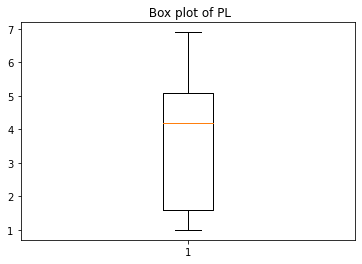

In [11]:
#plotting boxplot to check for outliers
plt.boxplot(data_df['PL'])
plt.title(' Box plot of PL');

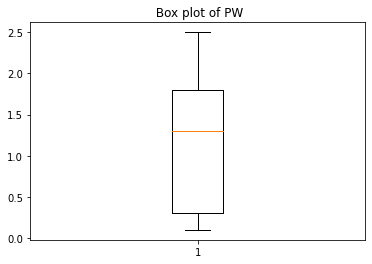

In [12]:
#plotting boxplot to check for outliers
plt.boxplot(data_df['PW'])
plt.title(' Box plot of PW');

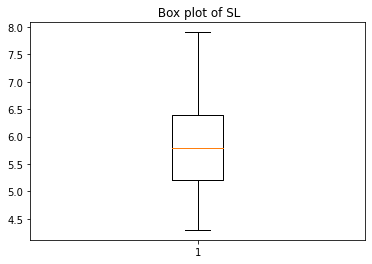

In [13]:
#plotting boxplot to check for outliers
plt.boxplot(data_df['SL'])
plt.title(' Box plot of SL');

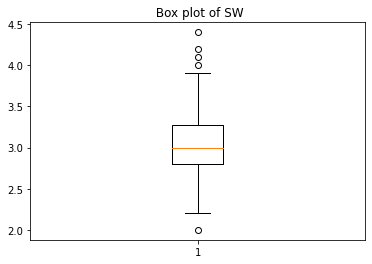

In [14]:
#plotting boxplot to check for outliers
plt.boxplot(data_df['SW'])
plt.title(' Box plot of SW');

#### According to the boxplots, the columns PW,PL, and SL are not having any outliers. But SW is having some outliers and we can follow the below steps to remove it.

In [15]:
Q1 = np.percentile(data_df['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data_df['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data_df['SW'],75,interpolation='midpoint')
print("Q1: " ,Q1)
print("Q2: " ,Q2)
print("Q3: " ,Q3)
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print('IQR is : ', IQR)
print('Lower limit is : ', low_limit)
print('Upper limit is : ', upper_limit)

Q1:  2.8
Q2:  3.0
Q3:  3.25
IQR is :  0.4500000000000002
Lower limit is :  2.1249999999999996
Upper limit is :  3.9250000000000003


In [16]:
outlier=[]
for x in data_df['SW']:
    if (x>upper_limit) or (x<low_limit):
        outlier.append(x)
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [17]:
# To find the index of the outliers upper limit
ind1 = data_df['SW'] > upper_limit
print("Index of data less than the lower limit :",data_df.loc[ind1].index)
# To find the index of the outliers lower limit
ind2 = data_df['SW'] < low_limit
print("Index of data more than the upper limit :",data_df.loc[ind2].index)

Index of data less than the lower limit : Int64Index([14, 15, 32, 33], dtype='int64')
Index of data more than the upper limit : Int64Index([60], dtype='int64')


In [18]:
# Replacing outlier values with upper limit and lower limit 
data_df['SW']=np.where(data_df['SW']>upper_limit,upper_limit,np.where(data_df['SW']<low_limit,low_limit,data_df['SW']))

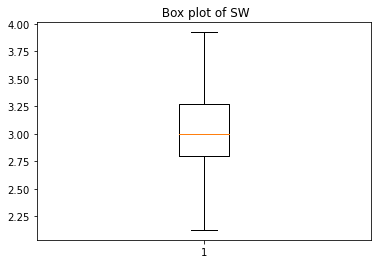

In [19]:
#plotting boxplot to check for outliers
plt.boxplot(data_df['SW'])
plt.title(' Box plot of SW');

#### We have replaced null values, encoded the object datatype columns and also handled the outliers successfully. 

### Question - 3 
Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [20]:
x = data_df.drop('Classification', axis=1)
y = pd.DataFrame(data_df['Classification'])

In [21]:
# Splitting the data into train and test with 80% and 20% respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2, test_size=0.20)

In [22]:
# Show the results of the split
print('x_train :',x_train.shape)
print('y_train :',y_train.shape)
print('x_test :',x_test.shape)
print('y_test :',y_test.shape)

x_train : (120, 4)
y_train : (120, 1)
x_test : (30, 4)
y_test : (30, 1)


###  Random Forest

In [23]:
# MODEL 1 --> fitting on training data 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
# predicting on the test data 
y_pred = rf.predict(x_test)

In [25]:
print(confusion_matrix(y_test,y_pred))

[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]


In [26]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [27]:
print('Accuracy on Random Forest model is : ',accuracy_score(y_test, y_pred))

Accuracy on Random Forest model is :  0.9666666666666667


### Gradient Boosting

In [28]:
# MODEL 2 --> fitting on traning data 
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [29]:
# predicting on the test data 
y_pred = gb.predict(x_test)

In [30]:
print(confusion_matrix(y_test,y_pred))

[[14  0  0]
 [ 0  7  1]
 [ 0  1  7]]


In [31]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.88      0.88      0.88         8

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30



In [32]:
# calculating the accuracy score
print('Accuracy on Gradient Boosting model is ',accuracy_score(y_test, y_pred))

Accuracy on Gradient Boosting model is  0.9333333333333333


### Extreme Gradient Boosting

In [33]:
# MODEL 3 --> fitting on traning data 
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

[18:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [34]:
# predicting on the test data 
y_pred=xgb.predict(x_test)

In [35]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [36]:
# calculating the accuracy score
print('Accuracy on Extreme Gradient Boosting model is ',accuracy_score(y_test, y_pred))

Accuracy on Extreme Gradient Boosting model is  0.9666666666666667


### Decision Tree

In [37]:
# MODEL 4 --> fitting on traning data
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
# predicting on the test data
y_pred = dt_model.predict(x_test)

In [39]:
print ("Accuracy on Decision Tree model is ",metrics.accuracy_score(y_test,y_pred))

Accuracy on Decision Tree model is  0.9333333333333333


### Conclusion


Accuracy on the models :
* Random Forest :  0.9666666666666667
* Gradient Boosting :  0.9333333333333333
* Extreme Gradient Boosting :  0.9666666666666667
* Decision Tree :  0.9333333333333333

From this result we are able to conclude that, Random Forest and Extreme Gradient Boosting works well with 96.67% accuracy.